In [3]:
import pandas as pd
from sklearn import datasets
#使用scikit-learn內建的資料:iris
iris = datasets.load_iris()
#用pandas將資料變成表格的形式
x = pd.DataFrame(iris['data'],columns = iris['feature_names'])
y = pd.DataFrame(iris['target'],columns = ['target_names'])
#合併起來
data = pd.concat([x,y], axis = 1)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target_names         150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


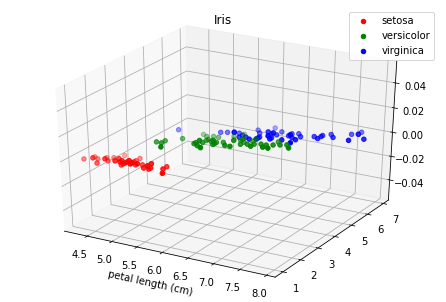

In [4]:
#挑選三個屬性印出其 3D 分布圖
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
X = iris['data']
Y = iris['target']
ax = Axes3D(plt.figure())
for c, i, target_name in zip('rgb', [0,1,2], iris.target_names):
    ax.scatter(X[Y==i, 0], X[Y==i, 2], c=c, label=target_name)
ax.set_xlabel(iris.feature_names[0])
ax.set_xlabel(iris.feature_names[1])
ax.set_xlabel(iris.feature_names[2])
ax.set_title('Iris')
plt.legend()
plt.show()

In [5]:
#用 PCA 對 Attribute 進行降維 n_components 設為 2 
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 36600 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 36600 missing from current font.
  font.set_text(s, 0, flags=flags)


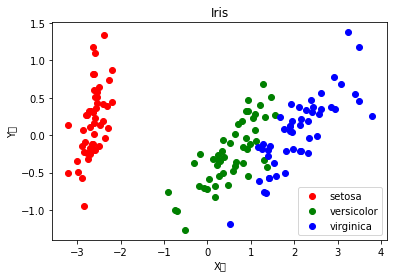

In [6]:
#印出 IRIS降維後的分布圖
X_new = pca.transform(X)
ax = plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], iris.target_names):
    plt.scatter(X_new[Y == i, 0], X_new[Y == i, 1], c=c, label=target_name)
plt.xlabel('X軸')
plt.ylabel('Y軸')
plt.title("Iris")
plt.legend()
plt.show()

In [42]:
from sklearn.preprocessing import StandardScaler
#讀取CSV檔案
data = pd.read_csv('BreastCancer.csv')
#data['diagnosis'].replace(0, 'Benign', inplace=True)
#data['diagnosis'].replace(1, 'Malignant', inplace=True)
x = data.loc[:,['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']].values
x = StandardScaler().fit_transform(x)
BreastCancer_pca = PCA(n_components = 2)
BP = BreastCancer_pca.fit_transform(data)

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

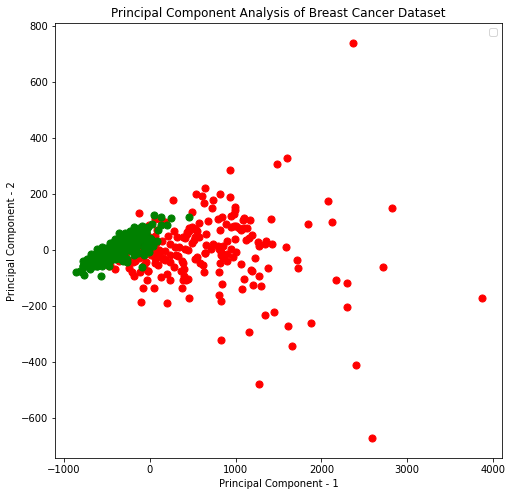

In [43]:
#印出BreastCancer降維後的分布圖
BreastCancer_pca_DataFrame = pd.DataFrame(data = BP, columns = ['principal component 1', 'principal component 2'])
plt.figure()
plt.figure(figsize=(8, 8))
plt.xlabel('Principal Component - 1')
plt.ylabel('Principal Component - 2')
plt.title("Principal Component Analysis of Breast Cancer Dataset")
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = data['diagnosis'] == target
    plt.scatter(BreastCancer_pca_DataFrame.loc[indicesToKeep, 'principal component 1']
               , BreastCancer_pca_DataFrame.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
plt.legend()
plt.show()